In [1]:
# Import the libraries needed for data handling and preprocessing
from sklearn.datasets import load_iris  # For loading the Iris dataset
import pandas as pd  # For handling the dataset in a DataFrame
from sklearn.preprocessing import StandardScaler  # For scaling the data


In [3]:
# Load the Iris dataset using sklearn's load_iris() function
iris = load_iris()

# Convert the dataset into a DataFrame for easy handling
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Print the first few rows of the DataFrame to check the data
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [5]:
# Scaling is important to normalize the data for clustering
scaler = StandardScaler()  # Initialize the scaler
df_scaled = scaler.fit_transform(df)  # Scale the data

# Print the first few rows of the scaled data
print(df_scaled[:5])  # Scaled data will be in array format


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [7]:
# Import KMeans for clustering
from sklearn.cluster import KMeans


In [9]:
# Initialize the KMeans algorithm with 3 clusters (n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the scaled data to the KMeans model
kmeans.fit(df_scaled)

# Retrieve the cluster labels assigned to each data point
labels_kmeans = kmeans.labels_

# Print the first 10 cluster labels
print(labels_kmeans[:10])


[1 2 2 2 1 1 1 1 2 2]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
# Add the cluster labels as a new column in the original DataFrame
df['Cluster_KMeans'] = labels_kmeans

# Check the updated DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster_KMeans  
0               1  
1               2  
2               2  
3               2  
4               1  


In [13]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Reduce the scaled data to 2 dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Add PCA components as new columns in the DataFrame
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Print the DataFrame to confirm PCA columns
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster_KMeans      PCA1      PCA2  
0               1 -2.264703  0.480027  
1               2 -2.080961 -0.674134  
2               2 -2.364229 -0.341908  
3               2 -2.299384 -0.597395  
4               1 -2.389842  0.646835  


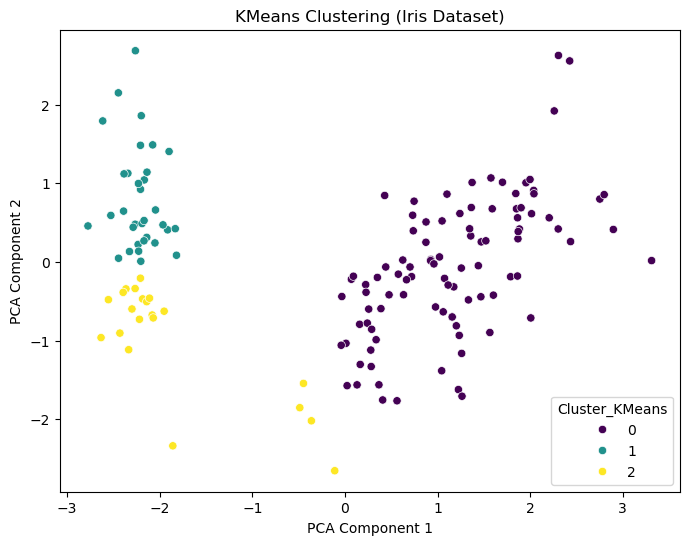

In [15]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters using a scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='viridis', data=df)

# Add title and labels
plt.title('KMeans Clustering (Iris Dataset)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()


In [17]:
# Import Hierarchical Clustering tools
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [19]:
# Perform the linkage for hierarchical clustering using 'ward' method
linkage_matrix = linkage(df_scaled, method='ward')

# Print the first 5 linkage matrix rows to understand its structure
print(linkage_matrix[:5])


[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.21167870e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.21167870e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.31632184e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.31632184e-01 2.00000000e+00]]


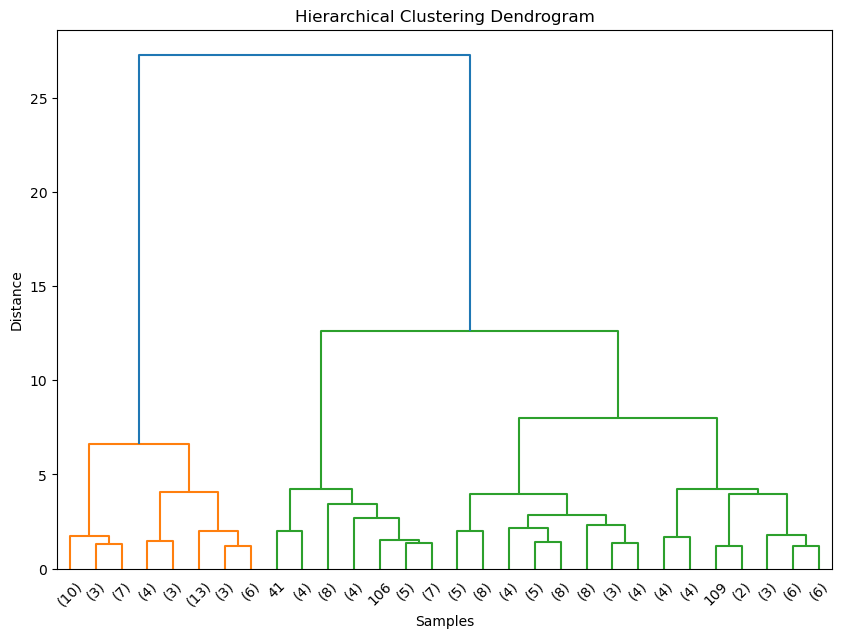

In [21]:
# Plot the dendrogram to visualize cluster formation
plt.figure(figsize=(10, 7))  # Set figure size
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)  # Only last 30 merges

# Add title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

# Show the plot
plt.show()


In [23]:
# Create cluster labels by cutting the dendrogram at 3 clusters
cluster_labels_hierarchical = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Add the hierarchical cluster labels to the DataFrame
df['Cluster_Hierarchical'] = cluster_labels_hierarchical

# Check the updated DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster_KMeans      PCA1      PCA2  Cluster_Hierarchical  
0               1 -2.264703  0.480027                     1  
1               2 -2.080961 -0.674134                     1  
2               2 -2.364229 -0.341908                     1  
3               2 -2.299384 -0.597395                     1  
4               1 -2.389842  0.646835                     1  


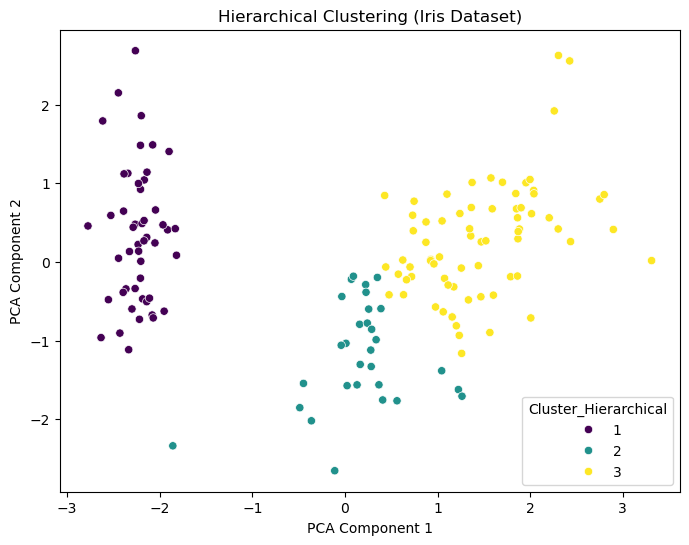

In [25]:
# Plot the hierarchical clusters using PCA components
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Hierarchical', palette='viridis', data=df)

# Add title and labels
plt.title('Hierarchical Clustering (Iris Dataset)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()
